In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(""))))


In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
from tqdm.notebook import trange
import tensorflow as tf
from tensorflow import keras

from src import ROOT_DIR


In [3]:
sns.set_theme("paper", "whitegrid", "Dark2", "DejaVu Sans", rc={"figure.dpi": 100})


In [4]:
file_path = f"{ROOT_DIR}/glow/safe/128-2_2022-09-20_17:36:27/epoch_results.csv"
df = pd.read_csv(file_path)


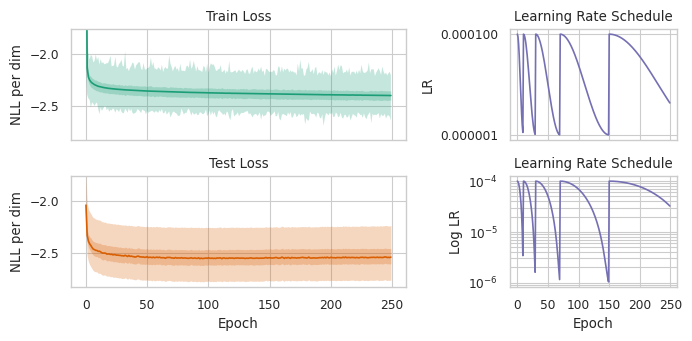

In [5]:
fig, axs = plt.subplots(
    2,
    2,
    sharex=True,
    sharey=False,
    figsize=(7.0866, 3.5),
    tight_layout=True,
    gridspec_kw={"width_ratios": [2, 1]},
)

axs[1, 0].sharey(axs[0, 0])

e = 0

axs[0, 0].fill_between(
    range(len(df.index))[e:], df["train_min"][e:], df["train_max"][e:], color="C0", lw=0, alpha=0.25
)
axs[0, 0].fill_between(
    range(len(df.index))[e:], df["train_q25"][e:], df["train_q75"][e:], color="C0", lw=0, alpha=0.25
)
axs[0, 0].plot(range(len(df.index))[e:], df["train_mean"][e:], c="C0")

axs[1, 0].fill_between(
    range(len(df.index))[e:], df["test_min"][e:], df["test_max"][e:], color="C1", lw=0, alpha=0.25
)
axs[1, 0].fill_between(
    range(len(df.index))[e:], df["test_q25"][e:], df["test_q75"][e:], color="C1", lw=0, alpha=0.25
)
axs[1, 0].plot(range(len(df.index))[e:], df["test_mean"][e:], c="C1")

axs[0, 1].plot(range(len(df.index)), df["learning_rate"], c="C2")

axs[1, 1].plot(range(len(df.index)), df["learning_rate"], c="C2")

axs[0, 0].set_title("Train Loss")
axs[0, 1].set_title("Learning Rate Schedule")
axs[1, 0].set_title("Test Loss")
axs[1, 1].set_title("Learning Rate Schedule")

axs[1, 0].set_xlabel("Epoch")
axs[1, 1].set_xlabel("Epoch")

axs[0, 0].set_ylabel("NLL per dim")
axs[0, 1].set_ylabel("LR")
axs[1, 0].set_ylabel("NLL per dim")
axs[1, 1].set_ylabel("Log LR")

axs[0, 0].set_ylim(-2.8264055490493774, -1.7592568159103394)

axs[0, 1].set_yticks([1e-4, 1e-6])
axs[1, 1].set_yscale("log")
axs[0, 1].grid(True, "both", "both")
axs[1, 1].grid(True, "both", "both")

plt.show()


---

In [6]:
file_path = f"{ROOT_DIR}/resnet/safe/resnet-D-2_2022-10-05_10:20:37/history.csv"
df = pd.read_csv(file_path)


  0%|          | 0/29970 [00:00<?, ?it/s]

2022-10-23 17:32:18.156415: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-23 17:32:18.216713: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


0.0005  -->  5.4594588e-05


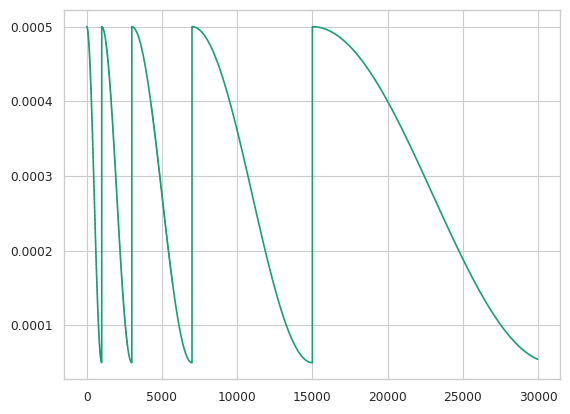

In [7]:
n = 333 * 90
# Hyperparameters need to be set manually
lr_scheduler = keras.optimizers.schedules.CosineDecayRestarts(
    0.0005, 1000, t_mul=2.0, m_mul=1.0, alpha=0.1
)

lrs = []

for i in trange(n):
    lrs.append(lr_scheduler(i))

plt.plot(lrs, ds="steps-mid")

print(lrs[0].numpy(), " --> ", lrs[-1].numpy())


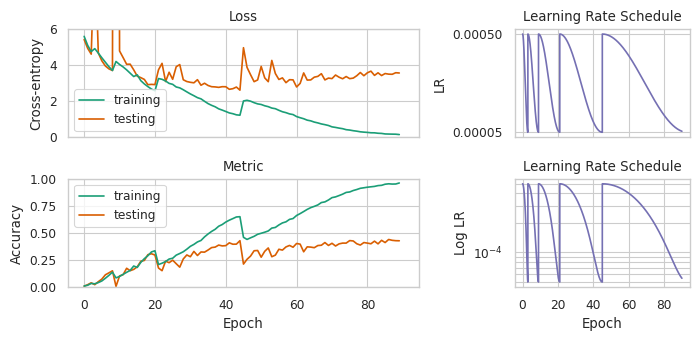

In [8]:
fig, axs = plt.subplots(
    2,
    2,
    sharex=True,
    sharey=False,
    figsize=(7.0866, 3.5),
    tight_layout=True,
    gridspec_kw={"width_ratios": [2, 1]},
)

axs[0, 0].plot(range(len(df.index)), df["loss"], c="C0", zorder=4, label="training")
axs[0, 0].plot(range(len(df.index)), df["val_loss"], c="C1", label="testing")

axs[1, 0].plot(range(len(df.index)), df["accuracy"], c="C0", zorder=4, label="training")
axs[1, 0].plot(range(len(df.index)), df["val_accuracy"], c="C1", label="testing")

axs[0, 1].plot(np.arange(len(lrs)) / 333, lrs, c="C2")

axs[1, 1].plot(np.arange(len(lrs)) / 333, lrs, c="C2")

axs[0, 0].set_ylim(0, 6)
axs[1, 0].set_ylim(0, 1)

axs[0, 0].set_title("Loss")
axs[0, 1].set_title("Learning Rate Schedule")
axs[1, 0].set_title("Metric")
axs[1, 1].set_title("Learning Rate Schedule")

axs[1, 0].set_xlabel("Epoch")
axs[1, 1].set_xlabel("Epoch")

axs[0, 0].set_ylabel("Cross-entropy")
axs[0, 1].set_ylabel("LR")
axs[1, 0].set_ylabel("Accuracy")
axs[1, 1].set_ylabel("Log LR")


axs[0, 1].set_yticks([5e-4, 5e-5])
axs[1, 1].set_yscale("log")
axs[0, 1].grid(True, "both", "both")
axs[1, 1].grid(True, "both", "both")

axs[0, 0].legend(loc="lower left")
axs[1, 0].legend(loc="upper left")

plt.show()
